In [13]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [14]:
data=pd.read_csv("Downloads\\Churn_Modelling.csv")


In [15]:
df=data.head(10)

In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

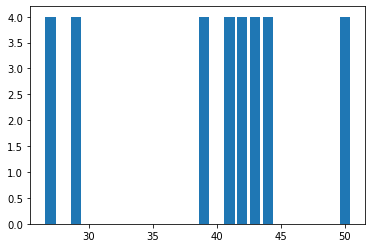

In [56]:
plt.bar (df['Age'],4)

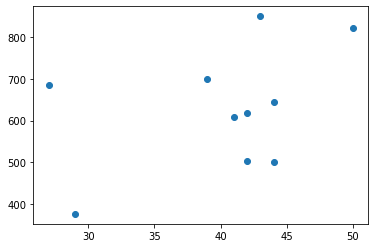

In [20]:
plt.scatter(df['Age'],df['CreditScore'])

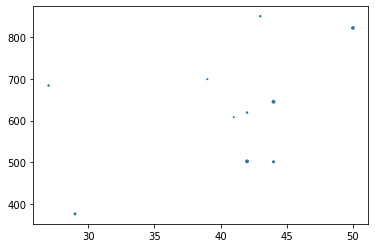

In [21]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

In [22]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

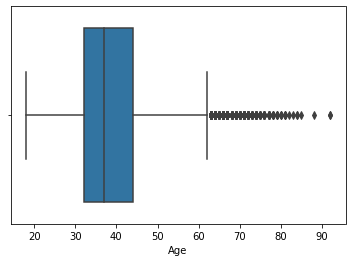

In [24]:
sns.boxplot(data['Age'])

In [25]:
q=data.quantile(q=[0.75,0.5])

In [26]:
iqr=q.iloc[0]-q.iloc[1]

In [27]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [28]:
l=q.iloc[1]-(1.5*iqr)

In [29]:
l['Age']

26.5

In [30]:
u=q.iloc[1]+(1.5*iqr)

In [31]:
u['Age']

47.5

In [32]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

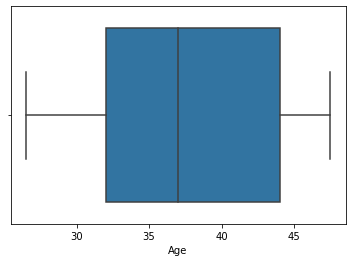

In [33]:
sns.boxplot(data['Age'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [36]:
le=LabelEncoder()

In [37]:
data['Surname']=le.fit_transform(data['Surname'])

In [38]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [39]:
data['Geography']=le.fit_transform(data['Geography'])

In [40]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [41]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52,1


In [42]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52


In [43]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [44]:
from sklearn.preprocessing import scale

In [45]:
scale(x)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6797,6798,15811978,2645,693,1,0,46.0,2,104763.41,1,1,1,62368.33
8042,8043,15785352,451,606,0,0,37.0,6,82373.94,1,0,0,172526.90
2218,2219,15752488,810,733,2,1,31.0,9,102289.85,1,1,1,115441.66
3980,3981,15695792,439,673,0,0,47.5,0,0.00,1,1,1,85733.33
4103,4104,15693337,2152,683,2,0,41.0,0,148863.17,1,1,1,163911.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9720,9721,15621815,1995,803,0,1,40.0,6,165526.71,1,1,0,12328.08
2653,2654,15785078,910,730,2,0,26.5,3,0.00,1,1,0,34542.41
6115,6116,15604813,2912,494,0,0,40.0,7,0.00,2,0,1,158071.69
1309,1310,15690079,290,591,2,0,30.0,8,124857.69,2,0,0,50485.70


In [49]:
x_train.shape

(8000, 13)

In [50]:
y_train

6797    0
8042    1
2218    0
3980    0
4103    0
       ..
9720    0
2653    0
6115    0
1309    0
1932    0
Name: Exited, Length: 8000, dtype: int64

In [51]:
y_train.shape

(8000,)

In [52]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3326,3327,15799626,735,637,1,0,47.5,4,126345.55,1,0,1,17323.00
5161,5162,15772250,2674,842,2,0,46.0,9,0.00,1,0,0,17268.02
4728,4729,15765650,499,501,1,0,40.0,5,114655.58,1,0,0,126535.92
6104,6105,15750731,2645,736,1,0,47.5,9,116309.01,1,1,0,185360.40
7364,7365,15641733,1819,671,0,1,34.0,5,164757.56,1,1,0,110748.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,15567078,1447,789,0,1,27.0,8,66201.96,1,1,1,79458.12
2007,2008,15727384,545,705,1,1,43.0,10,146547.78,1,0,1,10072.55
1241,1242,15760774,1116,519,0,1,26.5,1,146329.57,2,1,1,194867.27
7073,7074,15585855,1044,679,0,0,40.0,1,0.00,1,1,1,16897.19


In [53]:
x_test.shape

(2000, 13)

In [54]:
y_train

6797    0
8042    1
2218    0
3980    0
4103    0
       ..
9720    0
2653    0
6115    0
1309    0
1932    0
Name: Exited, Length: 8000, dtype: int64

In [55]:
y_test.shape

(2000,)